## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [2]:
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='inner')
df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

sum_df = pd.DataFrame({"Mean": round(df["Tumor Volume (mm3)"].mean(), 2),
         "Median": round(df["Tumor Volume (mm3)"].median(), 2),
         "Variance": round(df["Tumor Volume (mm3)"].var(), 2),
         "Standard Deviation": round(df["Tumor Volume (mm3)"].std(), 2),
         "SEM": round(df["Tumor Volume (mm3)"].sem(), 5)}, index=[0])
sum_df

,Mean,Median,Variance,Standard Deviation,SEM
0,50.45,48.95,79.12,8.89,0.20444


## Bar plots

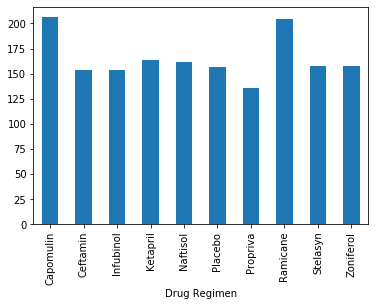

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
group_df = df.groupby(["Drug Regimen"]).nunique()
tumorList = group_df["Tumor Volume (mm3)"]
plot_bar = tumorList.plot.bar()

Text(0, 0.5, 'Tumor Volume (mm3)')

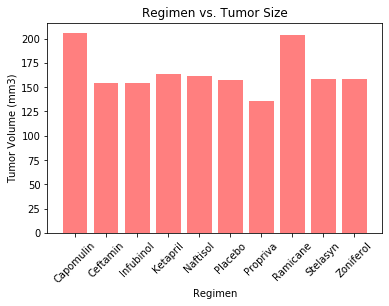

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Creating Bar Graph
x_axis = np.arange(len(tumorList))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", 
                            "Ketapril", "Naftisol", "Placebo", 
                            "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation='45')
plt.subplots_adjust(bottom=0.15)

#Labels
plt.bar(x_axis, tumorList, color='r', alpha=0.5, align="center")
plt.title("Regimen vs. Tumor Size")
plt.xlabel("Regimen")
plt.ylabel("Tumor Volume (mm3)")

## Pie plots

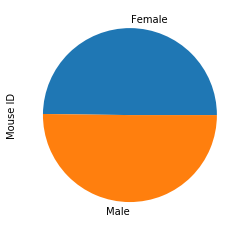

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_df = df.groupby(["Sex"]).nunique()
pie_df = pie_df["Mouse ID"]
pie_df.plot.pie()

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["red", "lightskyblue"]
plt.pie(pie_df, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Female vs. Male Testing")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

#Sorting to find the smallest tumor sizes
sort_df = df.groupby('Drug Regimen').nunique().sort_values("Tumor Volume (mm3)")
sort_df.head(4)

#Finding only rows associated with the end times
end_df = df.loc[df["Timepoint"] == 45]
pro_df = end_df.loc[df["Drug Regimen"] == "Propriva"]               
ceft_df = end_df.loc[df["Drug Regimen"] == "Ceftamin"]               
inf_df = end_df.loc[df["Drug Regimen"] == "Infubinol"]               
pla_df = end_df.loc[df["Drug Regimen"] == "Placebo"]               

#Sorting through values to get smallest final tumor volume
pro_df = pro_df.sort_values("Tumor Volume (mm3)")
ceft_df = ceft_df.sort_values("Tumor Volume (mm3)")
inf_df = inf_df.sort_values("Tumor Volume (mm3)")
pla_df = pla_df.sort_values("Tumor Volume (mm3)")

In [8]:
#Propriva DF
pro_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
962,i635,Propriva,Male,21,26,45,58.633404,3
550,a699,Propriva,Female,5,28,45,62.191414,1
1540,t198,Propriva,Male,22,26,45,64.911363,4
1693,w350,Propriva,Male,7,26,45,64.957562,2
1658,v991,Propriva,Female,10,30,45,70.167749,4
903,g570,Propriva,Male,16,29,45,70.492788,2
1290,o562,Propriva,Female,4,25,45,72.455421,2


In [9]:
#Ceftamin DF
ceft_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1260,o287,Ceftamin,Male,2,28,45,59.741901,4
1132,l661,Ceftamin,Male,18,26,45,59.851956,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
993,j296,Ceftamin,Female,24,30,45,61.849023,3
493,a275,Ceftamin,Female,20,28,45,62.999356,3
1162,l733,Ceftamin,Female,4,30,45,64.299830,1
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1670,w151,Ceftamin,Male,24,25,45,67.527482,3


In [10]:
#Infubinol DF
inf_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
834,f345,Infubinol,Male,23,26,45,60.918767,1
800,e476,Infubinol,Male,23,26,45,62.435404,1
1872,z581,Infubinol,Female,24,25,45,62.754451,3
473,a251,Infubinol,Female,21,25,45,65.525743,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
1053,k483,Infubinol,Female,20,30,45,66.196912,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
463,a203,Infubinol,Female,20,23,45,67.973419,2
637,c139,Infubinol,Male,11,28,45,72.226731,2


In [11]:
# Placebo DF
pla_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1787,x773,Placebo,Female,21,30,45,58.634971,4
1561,t718,Placebo,Female,10,30,45,63.423695,4
657,c282,Placebo,Male,12,27,45,65.815165,2
1444,q787,Placebo,Male,17,27,45,66.096475,3
1833,y478,Placebo,Female,3,25,45,66.842635,1
706,c757,Placebo,Male,9,27,45,69.042841,3
716,c766,Placebo,Female,13,26,45,69.823146,4
483,a262,Placebo,Female,17,29,45,70.717621,4
577,a897,Placebo,Male,7,28,45,72.255963,4
1304,o795,Placebo,Female,20,26,45,73.059454,4


{'whiskers': [<matplotlib.lines.Line2D at 0x1a213d9f98>,
 'caps': [<matplotlib.lines.Line2D at 0x1a213e86d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a213d9e48>],
 'medians': [<matplotlib.lines.Line2D at 0x1a213e8d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a213e8fd0>],
 'means': []}

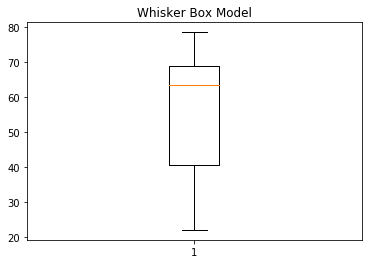

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Creates Whisker Box Model to see there are no outliers
tumors = end_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
ax1.set_title('Whisker Box Model')
ax1.set_ylabel('')
ax1.boxplot(tumors)

In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq, 2)
print(f"The IQR equals {iqr}, and there is no sign of an outlier")

The IQR equals 28.21, and there is no sign of an outlier


## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

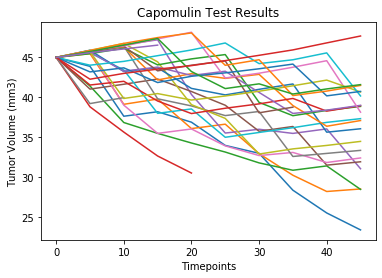

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Only get rows associated to Capomulin
cap_df = df.loc[df["Drug Regimen"] == "Capomulin"]     
mouses = cap_df["Mouse ID"].unique()

#For loop to place mouses on line graph
for i in range(len(mouses)):
    x = cap_df.loc[cap_df["Mouse ID"] == mouses[i]]["Timepoint"]
    y = cap_df.loc[cap_df["Mouse ID"] == mouses[i]]["Tumor Volume (mm3)"]
    plt.plot(x, y, label=mouses[i])

#Labels    
plt.title("Capomulin Test Results")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

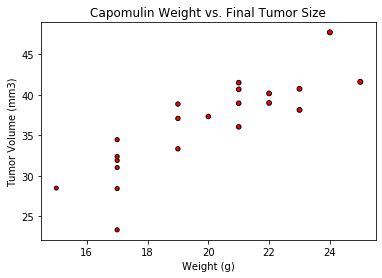

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Create a df with only the end time
mouses = cap_df.loc[cap_df["Timepoint"] == 45]

#Create x axis
x = mouses["Weight (g)"]

#Create y axis
y = mouses["Tumor Volume (mm3)"]

#Create graph
plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black", s=x, alpha=1.00)

#Create Labels
plt.title("Capomulin Weight vs. Final Tumor Size")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

The Correlation Coeffecient is 0.85.


Text(0, 0.5, 'Tumor Volume (mm3)')

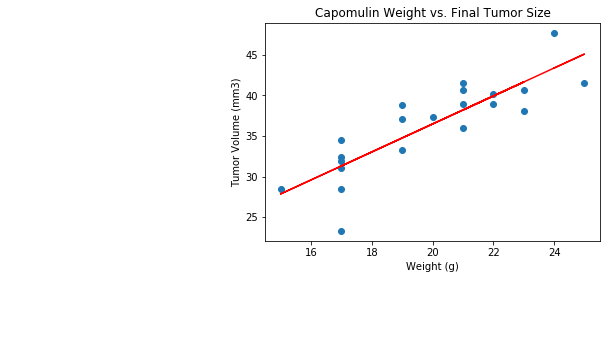

In [20]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#Calculate Correlation
correlation = st.pearsonr(x,y)
correlation = round(correlation[0],2)

#Get the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The Correlation Coeffecient is {correlation}.")

#Plotting the graph
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Labels
plt.title("Capomulin Weight vs. Final Tumor Size")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")